W mean value is 3.9933354536714485
b mean value is 4.932188779816705
======== Start Testing ======> Running learning rate: 1


<ipython-input-1-d40a9b29fa30>:42: RuntimeWarning: overflow encountered in double_scalars
  loss=sum([data**2 for data in (self.Y- y_current)])/N
<ipython-input-1-d40a9b29fa30>:47: RuntimeWarning: overflow encountered in double_scalars
  w_gradient=(2/N)*(sum(self.X*(self.Y-y_current)))
Still running, current step is: 500
Still running, current step is: 1000
Still running, current step is: 1500
Still running, current step is: 2000
Still running, current step is: 2500
Still running, current step is: 3000
Still running, current step is: 3500
Still running, current step is: 4000
Still running, current step is: 4500
Still running, current step is: 5000
Still running, current step is: 5500
Still running, current step is: 6000
Still running, current step is: 6500
Still running, current step is: 7000
Still running, current step is: 7500
Still running, current step is:

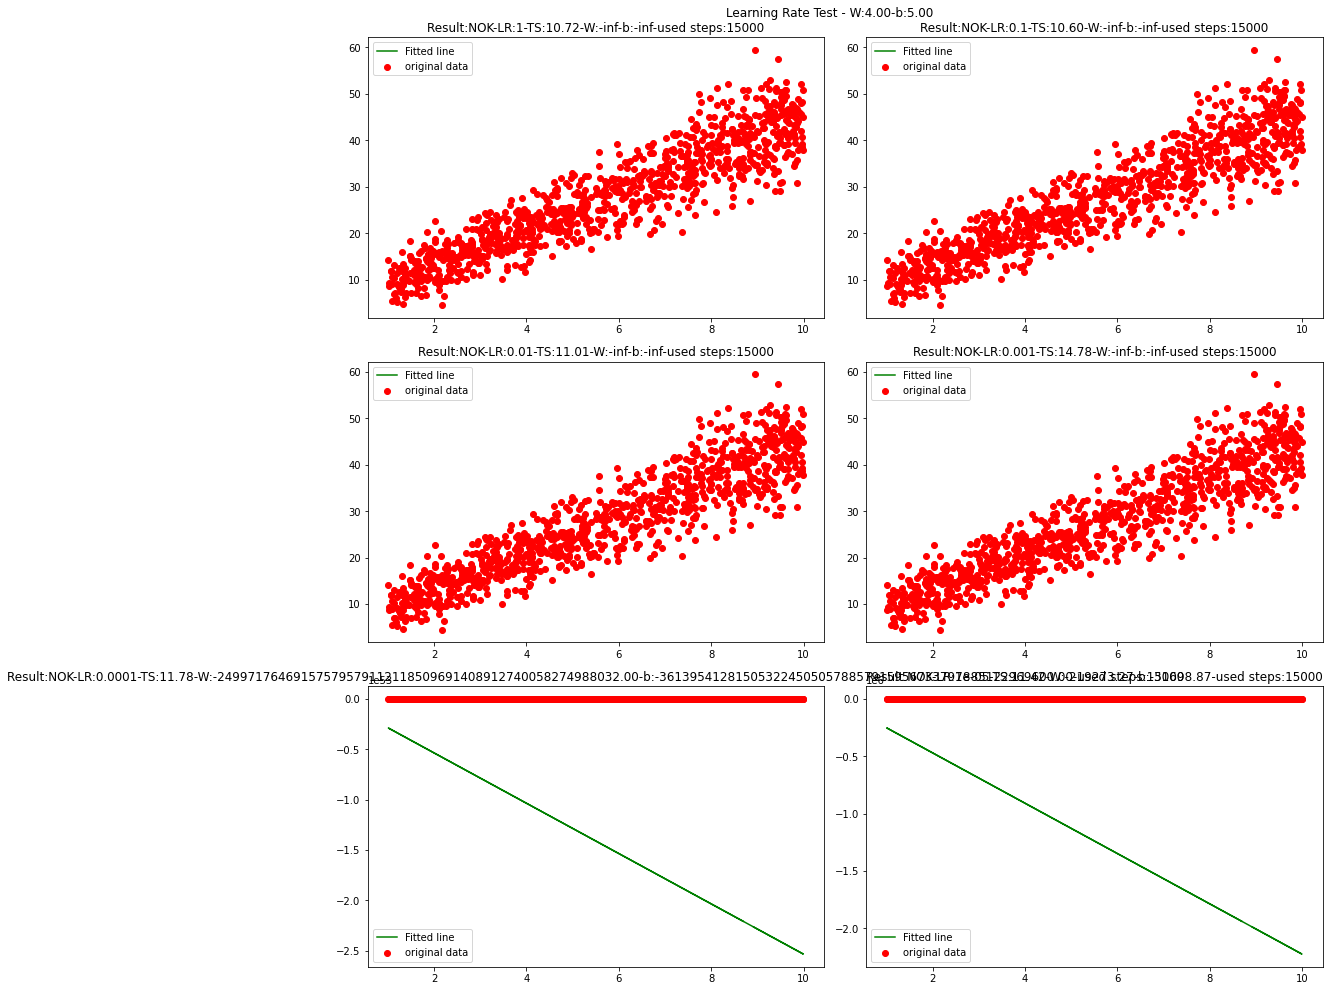

In [1]:
# This program is going to do linear regression using pure Python without using any machine learning model
#!pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import time
import sys

class linearRegression():
    def __init__(self, w_loc,w_scale,b_loc,b_scale,x1,x2,w_init,b_init, n_samples):
        self.n_samples=n_samples # number of samples to be used for training data

        # generate random distribution of w and b using normal distribution 
        w_dis = np.random.normal(w_loc, w_scale, n_samples) #given a range, generate samples for w
        b_dis = np.random.normal(b_loc, b_scale, n_samples) #given a range, generate samples for b

        self.w_constant = np.mean(w_dis) # get mean of w
        self.b_constant = np.mean(b_dis) # get mean of b

        print("W mean value is", self.w_constant)
        print("b mean value is", self.b_constant)

        #define the initial value for w and b
        self.w=w_init
        self.b=b_init

        #use following list to hold all the calucated values of w and b
        self.ws_list=[self.w]
        self.b_list=[self.b]

        # construct input X and output Y
        self.X = np.random.uniform(x1, x2, n_samples) #given a range, generate samples for x
        self.Y = np.multiply(self.X, w_dis) + b_dis #based on X, W, b, we will have Y (output) as trained data 


    def linear_regression(self,learning_rate):

        N=float(self.n_samples)
        # use initial value of w and b to calculate y as y_current
        y_current=(self.w*self.X)+self.b
        # calculate the loss according to standard mean error square 
        loss=sum([data**2 for data in (self.Y- y_current)])/N
        # For loss, we need do dloss/dw = w_gradient
        # d(loss)/dw= d(sum((y-y1)**2)/N)/dw = sum(2(y-y1) * d(y-y1)/dw)/N= sum(2(y-y1) * d(wx+b)/dw)/N= sum(2(y-y1)*x)/N
        # In above y1= y_current, N=n_samples 
        # So d(loss)/dw=2/N(sum(X*(y-y_current))) 
        w_gradient=(2/N)*(sum(self.X*(self.Y-y_current)))

        # Same for b_gradient, it's d(loss)/db= 2/N(sum(y-y1))
        b_gradient=(2/N)*(sum(self.Y-y_current))

        # use calculated gradient value to update w and b 
        self.w=self.w-(learning_rate*w_gradient)
        self.b=self.b-(learning_rate*b_gradient)
        
        self.ws_list.append(self.w)
        self.b_list.append(self.b)

    def mean_square(self,y_pred,y_value):
        return sum([data**2 for data in (y_pred-y_value)])/self.n_samples

    # def animate(i):
    #     plt.title('Linear Regression Gradient Descent step{i}')
    #     line.set_ydata(y_line[i])
    #     return line    

    # def animationplot(self)
    #     from IPython.display import HTML
    #     from matplotlib.animation import FuncAnimation
    #     fig=plt.figure()
    #     y_lines=(self.ws_list*self.X+self.b_list).T

    #     plt.scatter(self.X,self.Y)
    #     line,=plt.plot(X,y_lines[0],c='r')
        
    #     animation = FuncAnimation(fig=fig,func=animate, frames=len(w),interval=20)
    #     HTML(animation.to_jshtml())
      

def main(argv): # use main function to draw figure and compare 
    learning_rate = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001] #the learning rate we want to study
    Cols=2 # number of columes in the figure 
    testResult = "NOK" # identify if the test is OK or not 
    Tot = len(learning_rate)
    training_step = 15000 # specify training steps 
    used_step= 5000 # this is for figure plot 
    display_step = 500 # to control the display step number 
    Rows = Tot // Cols # determine how many rows of subplots in the figure 
    Rows += Tot % Cols # the extra row if it's not divided 
    w_loc=4 #local value of w
    w_scale=0.5 #scale of w
    b_loc=5 #local value of b
    b_scale=3 # scale of b
    x_low=1 #low range of x samples 
    x_high=10 #high range of x samples 
    W_initial=3 #initial value of W
    b_initial=3 # initial value of b 
    n_samples=1000 #number of samples 
    loss_value=0.0

    # Initialize a object based on defined class 
    p_LR = linearRegression(w_loc,w_scale,b_loc,b_scale,x_low,x_high,W_initial,b_initial,n_samples)

    fig=plt.figure(figsize=(14,14))
    fig.suptitle('Learning Rate Test - W:'+ '%.2f'%w_loc+'-b:'+'%.2f'%b_loc)

    for i in range(Tot):
        testResult = "NOK" # reset test result mark each iteration
        loss_value=0.0
        print("======== Start Testing ======> Running learning rate:", learning_rate[i])
        print("\n")
    
        start = time.time()
        for step in range(1, training_step + 1):
            p_LR.linear_regression(learning_rate[i])
            if step % display_step == 0:
                print("Still running, current step is:", step)
            if (abs(p_LR.w - w_loc) < 0.05) & (abs(p_LR.b-b_loc) < 0.05): #stop execution if w and b are within 5% range
                pred = p_LR.w*p_LR.X+p.LR.b
                loss = p_LR.mean_square(pred, p_LR.Y)
                print("Running step======>", step)
                print("Step: %i, loss: %f, W: %F, b: %f" % (step, loss, p_LR.w,p_LR.b))
                testResult = "OK"
                loss_value=loss
                used_step=step
                print("Test is OK!")
                break
        if testResult == "NOK": #not converge within given training steps 
            print("The regression doesn't converge!")
            print("After %d steps, W is %.2f, b is %.2f" % (training_step, p_LR.w, p_LR.b))
            used_step=training_step
            
        end = time.time()
        spentTime=end-start
        print(f"Runtime of the program is {spentTime}\n\n")
        ax=fig.add_subplot(Rows, Cols, i + 1)
        if testResult=="OK":
            ax.set_title('Result:'+testResult+'-LR:'+str(learning_rate[i])+'-'+'TS:'+ '%.2f' % spentTime+'-W:%.2f'%p_LR.w+'-b:%.2f'%p_LR.b+'-used steps:'+str(used_step)+'loss:%.2f'%loss_value)
        else:
            ax.set_title('Result:'+testResult+'-LR:'+str(learning_rate[i])+'-'+'TS:'+ '%.2f' % spentTime+'-W:%.2f'%p_LR.w+'-b:%.2f'%p_LR.b+'-used steps:'+str(used_step))
        ax.scatter(p_LR.X, p_LR.Y, c='r', label="original data")
        ax.plot(p_LR.X, np.array(p_LR.w * p_LR.X + p_LR.b), c='g', label='Fitted line')
        ax.legend()
        p_LR.w=W_initial
        p_LR.b=b_initial
        
        
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    main(sys.argv[1:])
    

